## Разностная задача (Неявная)
$$
\frac{u^{k+1}_n - u^{k}_n}{\tau} + e^{-hn}\frac{u^{k+1}_n-u^{k+1}_{n-1}}{n} = f(x_n, t^k),
$$

$$
u^0_n = u_0(x), n = 1..N
$$

$$
u^k_0 = u^1(t), k = 0..K-1
$$

1) Разнесем слагаемые с временного слоя $k+1$ в левую часть уранения, а с временного слоя $k$ в правую часть.
2) Умножим обе часть разностного уравнения на $\tau$
$$
    u^{k+1}_n + \frac{c_n\tau}{h}(u^{k+1}_n-u^{k+1}_{n-1}) = u^{k}_n + \tau f^k_n
$$ 
3) Перегруппируем слагаемые и введем новые обозначения.
   $$
       u^{k+1}_n(1+\frac{c_n\tau}{h}) - \frac{c_n\tau}{h}u^{k+1}_{n-1} = u^{k}_n + \tau f^k_n
   $$
   $$a^k_n = 1+\frac{c_n\tau}{h}, b^k_n = \frac{c_n\tau}{h}, \xi^k_n=u^{k}_n + \tau f^k_n$$
   Получим:
   $$a^k_nu^{k+1}_n - b^k_nu^{k+1}_{n-1} = \xi^k_n$$

4) Вспомним о наличии краевого условия при $x=0$ $u^k_0 = u^1(t), k = 0..K-1$. Тогда можем написать СЛАУ варьируя значение $n$ на фиксированном значении временного слоя $k+1$:
   $$
    \begin{cases}
    u^{k+1}_0 = u^1(t^{k+1}),\\
    a^{k}_1u^{k+1}_1 - b^k_1u^{k+1}_0 = \xi^k_1,\\
    \cdots \\
    a^{k}_Nu^{k+1}_N - b^k_1u^{k+1}_{N-1} = \xi^k_N.
    \end{cases}
   $$
Что эквивалентно СЛАУ
$$Ax = \Xi$$
с матрицей
   $$
    A = \begin{bmatrix}
    1 & 0 & 0 & 0 \\
    -b^{k}_1 & a^{k}_1 & 0 & 0 \\
    0 & -b^{k}_2 & a^{k}_2 & 0 \\
    0 & 0 & -b^{k}_3 & a^{k}_3 \\
    \end{bmatrix}
   $$

5) Получили линейную задачу для отыскания значений $u^{k+1}_n \forall n$
6) Это задача с двудиагональной матрицей. Ее решение находится как:
   $$
   u^{k+1}_n = \frac{b^k_nu^{k+1}_{n-1} + \xi^{k}_{n}}{a^k_{n}}, n = 1..N
   $$

In [1]:
### Пояснялки в комментариях
from matplotlib import pyplot as plt
### Пишешь не в jupyter - комментируй эту строку
%config InlineBackend.figure_formats = ['svg']
### Эту тоже
from ipywidgets import interact
### Это самая важная в мире библиотека без нее никуда
import numpy as np
import scipy as sp

In [2]:
import time
# Накидаем декоратор для определения времени выполнения программы
# Честно можно и без этого)
# При выполнении если писать без него программа будет не знать кто такой @timer, поэтому можно просто убрать
def timer(func):
    def wrapper(*args, **kwargs):
        # start the timer
        start_time = time.time()
        # call the decorated function
        result = func(*args, **kwargs)
        # remeasure the time
        end_time = time.time()
        # compute the elapsed time and print it
        exec_time = end_time - start_time
        #print(f"Exec time[{func.__name__}]:{exec_time} seconds")
        # return the result of the decorated function execution
        return result
    # return reference to the wrapper function
    return wrapper

# Напишем реализацию метода прогонки для двухдиагональной матрицы
@timer
def mysolve(A, b):
    m = len(b)
    U = np.zeros(m)
    U[0] = b[0]
    for k in range(1, m):
        b_k = -A[k, k-1]
        a_k = A[k, k]
        xi_k = b[k]
        U[k] = (b_k*U[k-1]+xi_k)/a_k
    return U

# definitions decorated functions
@timer
def spsolve(A, b):
    return sp.linalg.solve(A, b)

@timer
def npsolve(A, b):
    return np.linalg.solve(A, b)

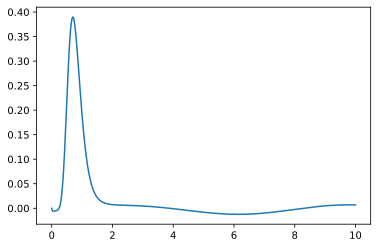

interactive(children=(IntSlider(value=505, description='N', max=1000, min=10), IntSlider(value=505, descriptio…

<function __main__.var(N, K, t)>

In [5]:
# Тут задаем начальное условие
def ux0(x):
    return np.exp(-(x-0.2)**2/0.01)

# Тут задаем краевое условие при x = 0
def u0t(t):
    return np.zeros(len(t))#0.1*np.sin(2*t)
    
# Неоднородная часть
def f(x, t):
    omega = 5
    return 0.1*np.sin(omega*t)*np.cos(x)

# Зависимость скорости от координаты
def c(x):
    return 1.1 - np.exp(-x**2/25)#1/(1+np.exp(x))

def solve_implict(N, K, Tmax, Xmax):
    # На каждом шаге будем составлять матрицу описанного вида
    # Затем получать решения для описанных методов в предыдущем блоке
    # Вычисляем наши шаги, по факту они практически не нужны
    tau = Tmax/K; h = Xmax/N;
    
    # Тут запишем чего мы ждем - матрицу K*N
    U = np.zeros((K, N))
    
    # Заданим массив из Х от 0 до 1 из N точек, шаг эта штука считает сама
    X = np.linspace(0, Xmax, N)
    # Зададим массив из T
    T = np.linspace(0, Tmax, K)
    
    # Тут учтем кравевые условия
    U[0, :] = ux0(X)
    U[:, 0] = u0t(T)
    
    # initiate SLE matrix
    A = np.zeros((N, N))
    
    # initiate SLE b
    b_my = np.zeros(N)

    # coner matrix elem
    A[0, 0] = 1
    for k in range(0, K-1):
        # Зададим элменты на диагонали матрицы
        # Для этого срежем из матрицы первую строку и первый столбец
        A[1:, 1:][np.diag_indices_from(A[1:, 1:])] = 1+c(X[1:])*tau/h
        
        # Зададим элменты на побочной диагонали
        # Для этого срежем из матрицы первую строку и последний столбец
        # Побочная диагональ переедет на главнуюю
        A[1:, :-1][np.diag_indices_from(A[1:, :-1])] = -(c(X[1:])*tau/h)
        
        # Сотавим вектор правой части
        b_my[0] = U[k+1, 0]
        b_my[1:] = U[k, 1:] + tau*f(X[1:], tau*k)
        
        # Решаем СЛУ для нахождения k+1 слоя
        U[k+1] = mysolve(A, b_my)
    return X, T, U
    
def var(N, K, t):
    X, T, sol_exp = solve_implict(N, K, Tmax, Xmax)
    n = int(t*K/Tmax)%K
    plt.figure(figsize=(10, 4))
    # В заголовке написан коэффицент на который написана устойчивость
    plt.title(rf"$\tau$={Tmax/K}, $h$ = {Xmax/N}")
    plt.plot(X, sol_exp[n], label=f"u(x, {t})")
    plt.plot(X, c(X), label="c(x)")
    plt.legend()
    plt.show()
    return None   
    
Tmax = 50
Xmax = 10
X, T, U = solve_implict(1000, 100, Tmax, Xmax)
plt.plot(X, U[10])
plt.show()
interact(var, N=(10, 1000), K = (10, 1000), t=(0, Tmax, 0.1))

In [4]:
# точное решение однородного уравнения с аналогичными начальными условиями и с=х**2
# Тут задаем начальное условие
def ux0(x):
    return np.exp(-(x-0.2)**2/0.01)#1 - np.exp(-x)

# Тут задаем краевое условие при x = 0
def u0t(t):
    return 0
    
# Неоднородная часть
def f(x, t):
    omega = 10
    return 0#np.sin(omega*t)*x

# Зависимость скорости от координаты
def c(x):
    return x**2#*np.ones(len(x))#np.exp(-x)
    
def u_exact(x, t):
    return np.exp(-1/(0.1)**2*((x-0.2*(1+x*t))/(1+x*t))**2)

def var_tot(t):
    N = 1000
    K = 1000
    X, T, sol = solve_implict(N, K, Tmax, Xmax)
    n = int(t*K/Tmax)%K
    plt.figure(figsize=(10, 4))
    # В заголовке написан коэффицент на который написана устойчивость
    plt.title(rf"$\Delta u$ = {np.max(abs(sol[n] - u_exact(X, t)))}, $\tau$ = {Tmax/K}, $h$={1/N}")
    plt.plot(X, sol[n], label=r"$u(x, t)$")
    plt.plot(X, u_exact(X, t), label=r"$u_{exact}(x, t)$")
    plt.plot(X, c(X), label="c(x)")
    plt.legend()
    plt.show()
    plt.plot(X, abs(sol[n]-u_exact(X, t)))
    plt.show()
    return None
Tmax = 30
Xmax = 10
interact(var_tot, t=(0, Tmax, 0.1))
# Делаем вывод, что код написан правильно)

interactive(children=(FloatSlider(value=15.0, description='t', max=30.0), Output()), _dom_classes=('widget-int…

<function __main__.var_tot(t)>